In [2]:
import os, glob, pandas as pd

In [14]:
# Reading the dataset
df = pd.read_csv('biorxiv_clean.csv')
df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,97e0efc17b5a10c75f7c83b08423d27585a31df5,Immune phenotyping based on neutrophil-to-lymp...,"Bicheng Zhang, Xiaoyang Zhou, Chengliang Zhu, ...","Bicheng Zhang, Xiaoyang Zhou, Chengliang Zhu, ...",NaN,"Introduction\n\nSince December 2019, coronavir...",A new coronavirus associated with human respir...,"[{'first': 'Bicheng', 'middle': [], 'last': 'Z...","{'BIBREF0': {'ref_id': 'b0', 'title': 'A new c..."
1,33eff3ff8721d2abd9204e3aabd504e167f3f01d,NaN,"Yoshiyuki Sugishita, Junko Kurita, Tamie Sugaw...",Yoshiyuki Sugishita (National Institute of Inf...,Abstract\n\nBackground: To control COVID-19 ou...,Introduction\n\nThe initial case of COVID-19 i...,"Japan Ministry of Health, Labour and Welfare. ...","[{'first': 'Yoshiyuki', 'middle': [], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Japan M..."
2,c03736c4e12dd89176ccb6d67df4b0bdaecf15dd,Temperature dependence of COVID-19 transmission,Alessio Notari,"Alessio Notari (Universitat de Barcelona, Mart...",Abstract\n\nThe recent coronavirus pandemic fo...,INTRODUCTION\n\nThe recent coronavirus (COVID-...,The Effects of Temperature and Relative Humidi...,"[{'first': 'Alessio', 'middle': [], 'last': 'N...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The Eff..."
3,1f632ba80bc3f4c8a48b5d436dd843c3c48bbcf2,PriSeT: Efficient De Novo Primer Discovery,"Marie Hoffmann, Michael T Monaghan, Knut Reinert","Marie Hoffmann, Michael T Monaghan, Knut Reinert",Abstract\n\nMotivation: DNA metabarcoding is a...,\n\nmonly applied technique used to infer the ...,A molecular evolutionary framework for the phy...,"[{'first': 'Marie', 'middle': [], 'last': 'Hof...","{'BIBREF1': {'ref_id': 'b1', 'title': 'A molec..."
4,3c70c99afc7a38df3c4807857856ea258d378429,The molecular basis for Pompe disease 3 reveal...,"Derrick Deming, Karen Lee, Tracey Mcsherry, Ro...","Derrick Deming (University of Massachusetts, 9...",Abstract\n\nPompe disease results from a defec...,\n\nIntroduction encompasses residues 347-726 ...,therapy (ERT) in late-onset Type II Glycogenos...,"[{'first': 'Derrick', 'middle': [], 'last': 'D...","{'BIBREF0': {'ref_id': 'b0', 'title': 'therapy..."


In [15]:
df.shape

(1625, 9)

In [16]:
# Drop duplicated documents by paper_id
df.drop_duplicates(subset="paper_id", keep='first', inplace=True)

In [17]:
# Drop duplicated documents by text
df.drop_duplicates(subset="text", keep='first', inplace=True)
df.shape

(1624, 9)

In [18]:
#classify all articles according to key terms.
terms_group_id = "vaccines"

terms1 = [
    "Vaccines and therapeutics",
    "Efforts of vaccines",
    "Vaccines",
    "Efforts of therapeutics",
    "Therapeutics",
    "Therapeutics being developed",
    "Therapeutics being tried",
    "Effectiveness of drugs",
    "Drugs",
    "Drugs being developed",
    "Drugs being tried",
    "Clinical trials",
    "Bench trials",
    "Investigate less common viral inhibitors",
    "Naproxen",
    "Clarithromycin",
    "Minocyclinethat",
    "Exert effects on viral replication",
    "Exert effects"
]

terms2 = [
    "Potential complication",
    "Antibody-dependent enhancement",
    "Vaccine recipients",
    "Ade"
]

terms3 = [
    "Best animal models",
    "Predictive value",
    "Human vaccine"
]

terms4 = [
    "Capabilities to discover a therapeutic",
    "Not vaccine",
    "Clinical effectiveness studies",
    "Discover therapeutics",
    "include antiviral agents",
    "Antiviral agents"
]

terms5 = [
    "Alternative models",
    "Alternative",
    "Aid decision makers",
    "Prioritize and distribute scarce",
    "Prioritize scarce",
    "Distribute scarce",
    "Scarse",
    "Newly proven therapeutics",
    "Proven",
    "Production capacity",
    "Capacity",
    "Equitable distribution",
    "Timely distribution"
]

terms6 = [
    "Universal coronavirus vaccine",
    "Universal vaccine",
    "Coronavirus vaccine"
]

terms7 = [
    "Efforts to develop animal models",
    "Standardize challenge studies",
    "Challenge studies"
]

terms8 = [
    "Efforts to develop prophylaxis",
    "Develop prophylaxis",
    "Prophylaxis",
    "Healthcare workers"
]

terms9 = [
    "Approaches to evaluate risk",
    "Risk after vaccination",
    "After vaccine","After vaccination"
]

terms10 = [
    "Assays to evaluate vaccine",
    "Immune response",
    "Process development"
]

terms = terms1 + terms2 + terms3 + terms4 + terms5 
terms += terms6 + terms7 + terms8 + terms9 + terms10

In [22]:
import spacy
# Load Spacy english model
nlp = spacy.load('en', disable=['parser', 'ner', 'textcat'])
nlp.max_length = 5000000

In [23]:
#create matcher patterns 
from spacy.matcher import PhraseMatcher

#Create a Matcher to case insensitive text matching
matcher = PhraseMatcher(nlp.vocab, attr='LEMMA') 

# Create patterns from terms
patterns = [nlp(d) for d in terms]
matcher.add(terms_group_id, None, *patterns)

In [31]:

# #Defining the matcher
# def cord19_macther(samples):
#     #Total doc to test-----> testlimit
    
#     test_limit = 0
#     counter = 0
    
#     docs = df.sample(samples/100) if samples < 100 else df
#     tdocs = str(len(docs)
                
#     print(f"{tdocs} documents to proccess...")

In [ ]:
#     # Maximun allowed length of string text document
#     max_tlen = 100000

#     # initialize array and total found variables
#     findings_arr = []
                
    

In [36]:
# Defines the matcher

def cord_19_matcher(samples):   
    # variables to test: test_limt is the total of docs to test; 
    # 0 = test off
    
    test_limit = 0
    counter = 0

    docs = df.sample(frac = samples/100) if samples < 100 else df
    tdocs = str(len(docs))

    print(f"{tdocs} documents to proccess...")
        
    # Maximun allowed length of string text document
    max_tlen = 100000

    # initialize array and total found variables
    findings_arr = []

    # loop all articles to match terms
    for idx, row in docs.iterrows():
        try:
            paper_id = row['paper_id']
            text = row["text"]            
            
            doc = nlp(text)

            # get the matches
            matches = matcher(doc)

            # process all matches found in text
            if matches:
                for m in matches:
                    m_id, start, end = m[0],m[1],m[2]
                    term_group = nlp.vocab.strings[m_id]
                    term = doc[start:end].text

                    # put finding into json object
                    finding = {
                        "paper_id": paper_id,
                        "term_group": term_group,
                        "term": term
                    }

                    # append finding to findings array
                    findings_arr.append(finding)                

            counter += 1
            if counter % 100 == 0:
                print(f"{counter} documents proccessed")

            # breake loop if test control present
            if test_limit > 0:            
                if counter == test_limit:
                    print(test_limit, "sample count reached")
                    break

        except BaseException as e:
            print("Oops!  Error occurred in document loop.")
            print(str(e))
            print("Continuing...")
            continue
    
    return findings_arr


In [38]:
#Running the matcher
# Set sample parameter = % of papers to proccess
samples = 100
#calling the function
findings_arr = cord_19_matcher(samples)
tfound = len(findings_arr)
print(tfound, "matches found\n")

1624 documents to proccess...
100 documents proccessed
200 documents proccessed
300 documents proccessed
400 documents proccessed
500 documents proccessed
600 documents proccessed
700 documents proccessed
800 documents proccessed
900 documents proccessed
1000 documents proccessed
1100 documents proccessed
1200 documents proccessed
1300 documents proccessed
1400 documents proccessed
1500 documents proccessed
1600 documents proccessed
6969 matches found



In [39]:
# Put findings array into a dataframe
findings = pd.DataFrame(findings_arr)
findings.head()

,paper_id,term_group,term
0,97e0efc17b5a10c75f7c83b08423d27585a31df5,vaccines,immune response
1,97e0efc17b5a10c75f7c83b08423d27585a31df5,vaccines,immune responses
2,97e0efc17b5a10c75f7c83b08423d27585a31df5,vaccines,immune response
3,97e0efc17b5a10c75f7c83b08423d27585a31df5,vaccines,immune response
4,97e0efc17b5a10c75f7c83b08423d27585a31df5,vaccines,immune response


In [40]:
findings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6969 entries, 0 to 6968
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   paper_id    6969 non-null   object
 1   term_group  6969 non-null   object
 2   term        6969 non-null   object
dtypes: object(3)
memory usage: 163.5+ KB


In [42]:
# Capitalize each term in findings
findings["term"] = findings["term"].str.capitalize()

In [43]:
#Quantify documents by key terms
findings['count'] = ''
cnt = findings.groupby('term').count()[['count']]
cnt_s = cnt.sort_values(by='count', ascending=False).copy()

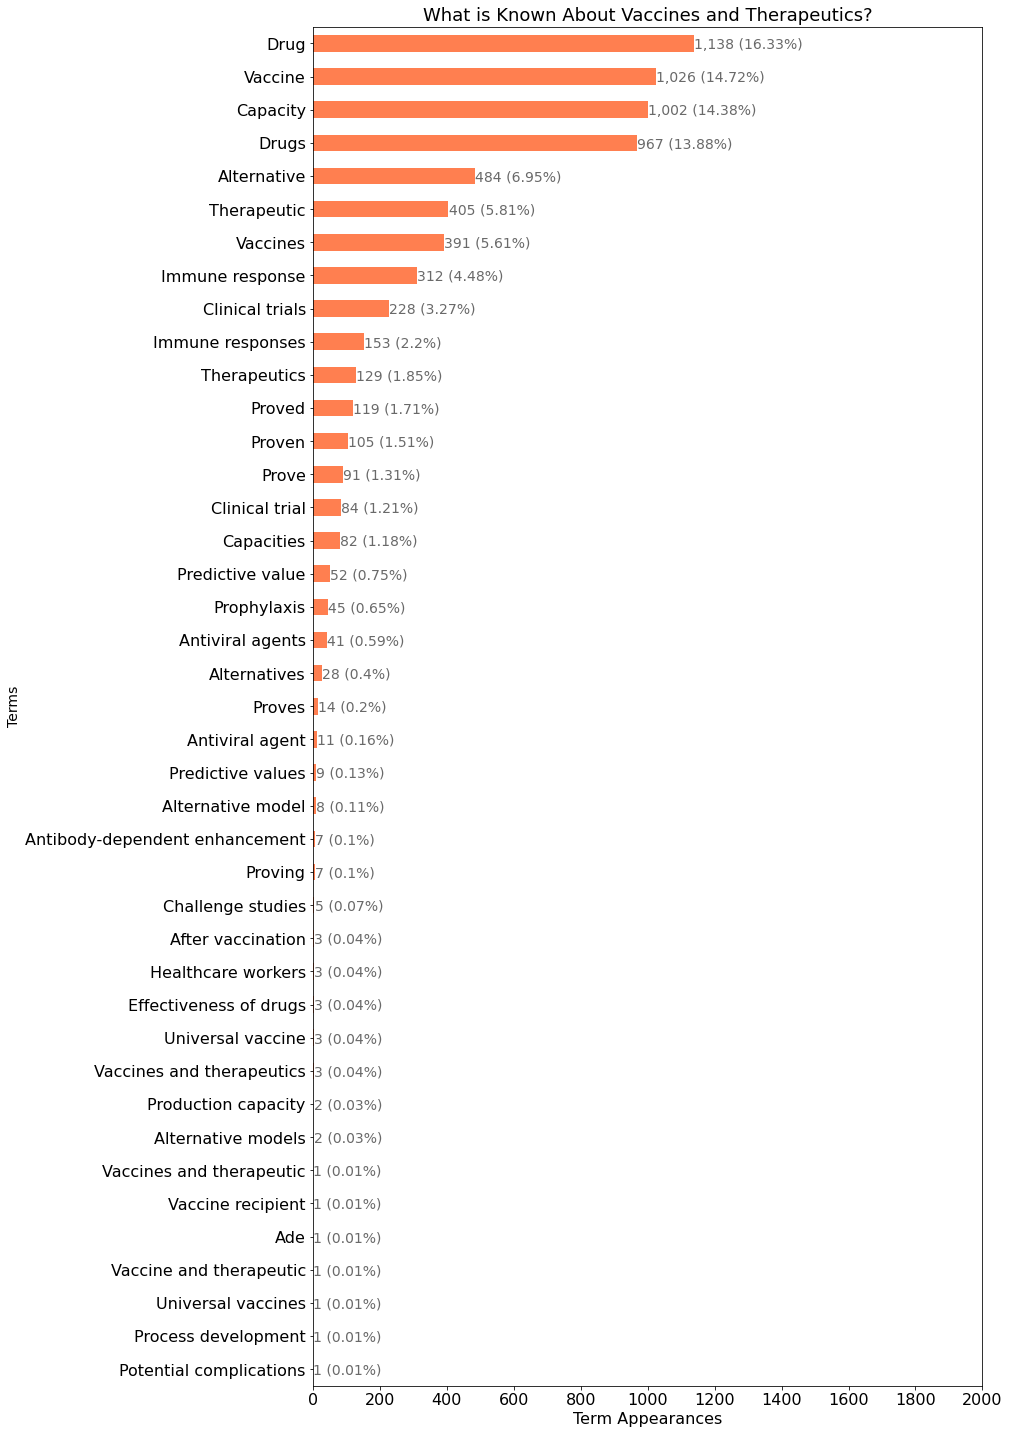

In [49]:
#Display a bar graph and a word cloud with the totals of findings  by key term.
ax = cnt_s.plot(kind='barh', figsize=(12,25), 
                legend=False, color="coral", 
                fontsize=16)
ax.set_alpha(0.8)
ax.set_title("What is Known About Vaccines and Therapeutics?",
             fontsize=18)
ax.set_xlabel("Term Appearances", fontsize=16);
ax.set_ylabel("Terms", fontsize=14);
ax.set_xticks([0,200,400,600,800,1000,1200,1400,1600,1800,2000])

# Create a list to collect the plt.patches data
totals = []

# Fill totals list
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

# Set bar labels using the list
for i in ax.patches:
    c = i.get_width()
    cnt = f'{c:,} '
    pct = str(round((c/total)*100, 2)) + '%'
    pct_f = "(" + pct + ")"
    ax.text(c+.3, i.get_y()+.4, cnt + pct_f, 
            fontsize=14, color='dimgrey')

# Invert graph 
ax.invert_yaxis()

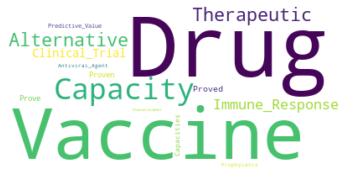

<Figure size 720x576 with 0 Axes>

In [45]:
#Dispalying wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Fill the list of words to show
term_values = ""
for term in findings['term']:
    term_val = str(term).title()
    term_val = term_val.replace(' ','_')
    term_val = term_val.replace('-','_')
    term_values += term_val + ' '

# Generates the wordcloud object
wordcloud = WordCloud(background_color="white",
                      collocations=False).generate(term_values)


# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=((10,8)))
plt.show()

In [50]:
#Group findings by key term and sort by key term and count.
#The first document in each group will be part of the response to the task question.
# findings_sta = findings.groupby(["term", "paper_id"]).size().reset_index(name="count")
# findings_sta = findings_sta.sort_values(by=['term','count'], ascending=False)

In [51]:
# # Helper

# def get_doc_text(paper_id):
#     doc = df.loc[df["paper_id"]==paper_id].iloc[0]
#     return doc["doc_text"]